### QFT Example with 50 Hz + 100 Hz signal

In [30]:
# Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # Correctly import AerSimulator from qiskit_aer
from qiskit_aer.library import save_statevector  # Import save_statevector to save results
from qiskit.circuit.library import QFT


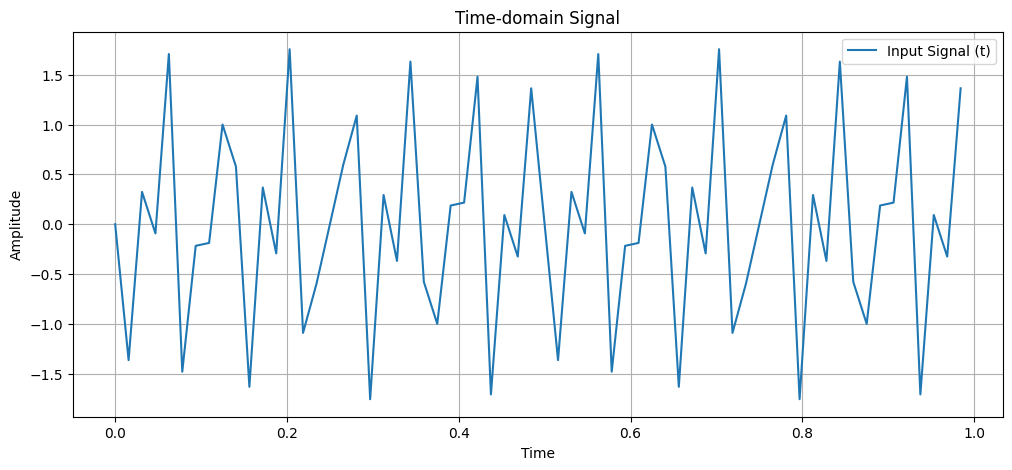

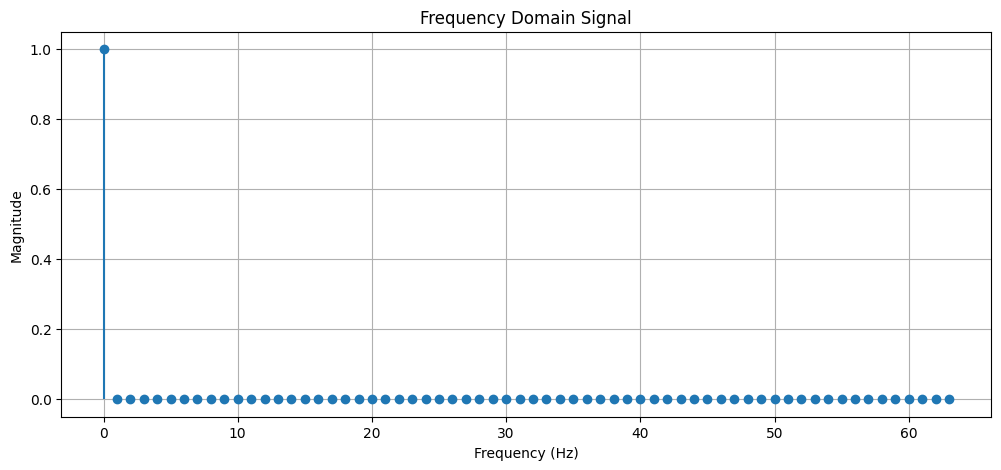

In [39]:
# Number of qubits
n_qubits = 6

# Sampling parameters
num_samples = 2 ** n_qubits
t = np.linspace(0, 1, num_samples, endpoint=False)

# Time-domain signal
freq1 = 50  # Frequency of the first sinusoid
freq2 = 100 # Frequency of the second sinusoid
signal = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# Input state for the QFT
# Normalization of the signal to fit into quantum states
normalized_signal = (signal - min(signal)) / (max(signal) - min(signal)) * (2 ** n_qubits - 1)
input_state = np.round(normalized_signal).astype(int)

# Quantum circuit
circuit = QuantumCircuit(n_qubits)

# Use of Hadamard gates to create superposition state
for i in range(n_qubits):
    circuit.h(i)

# QFT inverse
circuit.append(QFT(n_qubits, inverse=True), range(n_qubits))

# Save statevector to get results
circuit.save_statevector()

# Plot circuit
circuit.draw(output='mpl')

# Run circuit on simulator
simulator = AerSimulator()

# Transpile circuit for simulator
compiled_circuit = transpile(circuit, simulator)

# simulation and statevector
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()

# Frequency spectrum
frequency_spectrum = np.abs(statevector) ** 2


# PLOTS
# Time-domain Plot
plt.figure(figsize=(12, 5))
plt.plot(t, signal, label='Input Signal (t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-domain Signal')
plt.grid(True)
plt.legend()
plt.show()

# Frequency-domain Plot
plt.figure(figsize=(12, 5))
plt.stem(range(num_samples), frequency_spectrum, basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency-domain Signal')
plt.grid(True)
plt.show()